# Predict House Sale Price:

This Dataset contains House Price Data. The Target/response variable is the Sale Price. The Predictors are many in numbers.

The Data can be found here :

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The idea is to calculate the sales price based on various parameters. The dataset comes with Train and Test Data separetly. As can be seen below this dataset is extremely rich and I think I will use this data set throughout the weekly assignment wherever I see it is appropriate.

In this excerise, my primary goal was to create a Linear Regression Model by using Feature Selection on Train Data and then predict prices for Test Data. To select features I have depended upon correlation using Pearson method. Finally used Scikit Learn to develop the Linear Regression. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

# Load the Train and Test Datasets

In [3]:
train_Data = pd.read_csv('Input/train.csv')
test_Data = pd.read_csv('Input/test.csv')

In [4]:
train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#keeping for future iteration.

target = train_Data["SalePrice"]

all_Data = pd.concat([train_Data, test_Data], ignore_index=True)

# How Sales Price varies based on Living Area Square Fit:

Below is a EDA on Sales Prices based on the living area square fit. Over the years of personal experience with house rents and couple of attempts to own my house has given me this basic knowledge, with more area, we have to pay more prices. Of course things gets intersting with other variables.

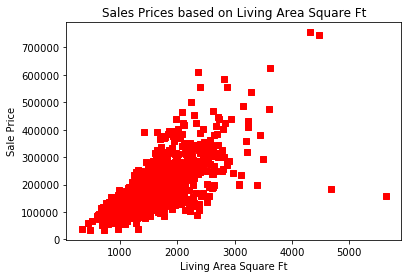

In [6]:
plt.scatter(train_Data['GrLivArea'], train_Data['SalePrice'], c = 'Red', marker = "s")
plt.title("Sales Prices based on Living Area Square Ft")
plt.ylabel("Sale Price")
plt.xlabel("Living Area Square Ft")
plt.show()

As can be seen above there are some outliers present in terms of sales price which may distors the norms. we can remove them.

In [7]:
train_Data = train_Data[train_Data['GrLivArea'] < 4500]

In [8]:
train_Data['SalePrice'].corr(train_Data['GrLivArea'])

0.73496816453593272

Lets review the Null Values here

In [9]:
nullValues = pd.isnull(all_Data).sum()

In [10]:
nullValues[nullValues>0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

There are many variables having null values in thousands. I am not sure if any Data Wrangling here will neccesailry make any impacts. so we will drop those columns where nulls are significanty high(+1000) in next step.

In [11]:
train_Data=train_Data.drop("Alley",1)
train_Data=train_Data.drop("Fence",1)
train_Data=train_Data.drop("FireplaceQu",1)
train_Data=train_Data.drop("MiscFeature",1)
train_Data=train_Data.drop("PoolQC",1)

# Correlation coefficient analysis (Pearson Method): 

However it is premature idea to think this problem as Simple Linear Rigression. As can be seen there are 80 Columns/predictors present in the dataset, so lets first check the Corelation between predictors. I have used pearson method as that is most commonly used and it computes the linear associatio between two continuos variables.

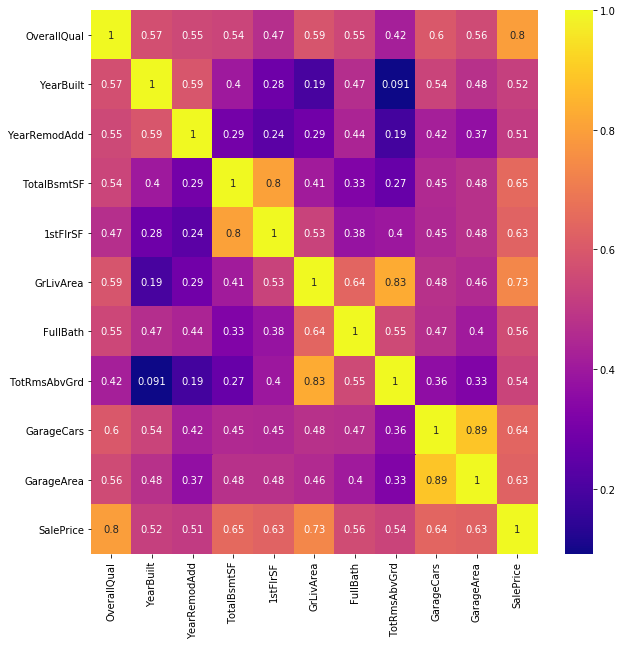

In [12]:
import seaborn as sns
corrmat = train_Data.corr(method='pearson')
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_Data[top_corr_features].corr(),annot=True,cmap="plasma")

Now it is intresting. As we can see the Sale Price is heavily correlated with multiple variables.

# Visualize the relationship between Features and Sales Price in scatterplot 

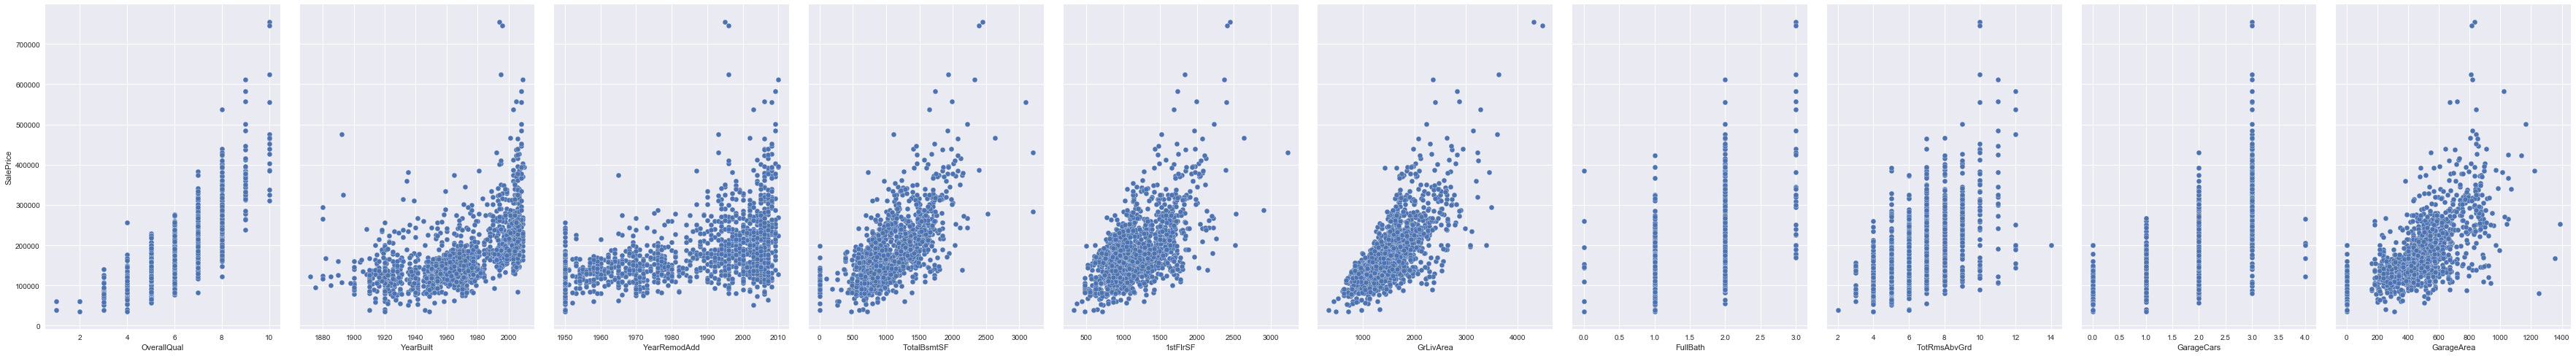

In [13]:
#top_Predictors = train_Data[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

data = train_Data[['SalePrice', 'OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

target = train_Data[['SalePrice']]

sns.set(font_scale=1.5)

sns.set()
sns.pairplot(data, x_vars=['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea'],
             y_vars ='SalePrice', size = 7,aspect=0.7)
plt.show()

There are some clear linear relationship can be found from above plots. expecially GarageArea, GrLivArea, TotalBsmtSF has linear relationship with sales price.  

Our multiple linear regression problem, now could be defined as below:

$y = \beta_0 + \beta_1 \times OverallQual  + \beta_2 \times YearBuilt + \beta_3 \times GrLivArea + \beta_4 \times GarageArea + \beta_5 \times TotalBsmtSF$

# Estimating model coefficent using statsmodel (without TotalBsmtSF): 

In [29]:
import statsmodels.formula.api as smf

model = smf.ols(formula='SalePrice ~ OverallQual + YearBuilt + GrLivArea + GarageArea', data=data)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1303.
Date:                Sat, 17 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:30:45   Log-Likelihood:                -17409.
No. Observations:                1458   AIC:                         3.483e+04
Df Residuals:                    1453   BIC:                         3.485e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.629e+05   7.99e+04    -10.798      0.000   -1.02e+06   -7.06e+05
OverallQual  2.193e+04   1093.071     20.062      0.000    1.98e+04    2.41e+04
YearBuilt     398.4475     42.000      9.487      0.000     316.061     480.834
GrLivArea      64.0890      2.512     25.511      0.000      59.161      69.017
GarageArea     59.3511      5.875     10.101      0.000      47.826      70.876
==============================================================================
Omnibus:                      577.035   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5233.956
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                      11.720   Cond. No.                     2.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Estimating model coefficent using statsmodel (with TotalBsmtSF): 

In [28]:
import statsmodels.formula.api as smf

model = smf.ols(formula='SalePrice ~ OverallQual + YearBuilt + GrLivArea + GarageArea + TotalBsmtSF', data=data)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 17 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:30:09   Log-Likelihood:                -17295.
No. Observations:                1458   AIC:                         3.460e+04
Df Residuals:                    1452   BIC:                         3.463e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.389e+05   7.44e+04     -9.936      0.000   -8.85e+05   -5.93e+05
OverallQual  1.831e+04   1037.321     17.647      0.000    1.63e+04    2.03e+04
YearBuilt     331.5264     39.089      8.481      0.000     254.849     408.204
GrLivArea      59.7776      2.340     25.542      0.000      55.187      64.368
GarageArea     42.5669      5.540      7.683      0.000      31.699      53.434
TotalBsmtSF    42.1317      2.688     15.674      0.000      36.859      47.404
==============================================================================
Omnibus:                      501.333   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4629.790
Skew:                           1.331   Prob(JB):                         0.00
Kurtosis:                      11.314   Cond. No.                     2.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Interpreting the results:

Intercept is negative: In this case practically $X \neq 0$. Thus Intercept does not mean anything specific. It is also possible given that the fact none of the X values are close to 0.

Coefficent Analysis: As can be seen from above results:

* An unit increase in Over all Quality will result a increase of sales price of $1831.

* Similarly, an Unit increase in built year (i.e. the most recent built) increases the prices. 

* P-value is 0.0 for all the features so defitely an association exists between features and Sales.

* R-squared/R-squared Adujsted defintely has increased as we take into account of the feature TotalBsmtSF. However, increase of R-Squared not neccesarily an indicator of better model.  


# Estimating model coefficent using Scikit-Learn:


In [31]:
from sklearn import linear_model

features = ['OverallQual','YearBuilt', 'GrLivArea', 'GarageArea' , 'TotalBsmtSF']

X = data[features]
y = data.SalePrice

lm = linear_model.LinearRegression()

model = lm.fit(X,y)

print(model.intercept_, model.coef_)

-738862.63569 [ 18305.64106873    331.52637328     59.7775943      42.56689533
     42.13165655]


# Model Evaluation Using Train/Test Split using Cross Validation:

In [34]:
from sklearn import metrics
from sklearn.cross_validation import train_test_split

X = data[['OverallQual','YearBuilt', 'GrLivArea', 'GarageArea' ]]

y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

33585.1909676


In [35]:
X = data[['OverallQual','YearBuilt', 'GrLivArea', 'GarageArea','TotalBsmtSF' ]]

y = data.SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred = lm2.predict(X_test)

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

31023.3043412


# Mean Squared Error & Other improvements needs to be made:

As can be seen from above results that the TotalBsmtSF does bring down the difference. In fact it is still significantly high. This means we need to take in account other features as well. 

Improvements required:

* Log Transformation
* PCA
* Categorical variables handling